In [1]:
import pandas as pd
import numpy as np
import math
import json
import seaborn as sns


from sklearn.preprocessing import MultiLabelBinarizer

# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

First We will check how looks our 3 datasets

In [2]:
portfolio.head(3)

reward                      channels  difficulty  duration     offer_type  \
0      10       [email, mobile, social]          10         7           bogo   
1      10  [web, email, mobile, social]          10         5           bogo   
2       0          [web, email, mobile]           0         4  informational   

                                 id  
0  ae264e3637204a6fb9bb56bc8210ddfd  
1  4d5c57ea9a6940dd891ad53e9dbe8da0  
2  3f207df678b143eea3cee63160fa8bed

In [3]:

# changing channels into dummies variables by using MultiLabelBinarizer from sklearn
mlb = MultiLabelBinarizer()
arr_channels = mlb.fit_transform(portfolio['channels'])
cols = mlb.classes_

df_channels = pd.DataFrame(arr_channels,columns=cols.tolist())

#adding channels columns to portfolio df
portfolio[cols.tolist()] = df_channels

#using dummies to create new columns from offer type
df_offer_type = pd.get_dummies(portfolio['offer_type'])
portfolio[df_offer_type.columns.tolist()] =  df_offer_type

#removing unecessary columns from df
portfolio.drop(columns=['channels'],inplace=True)

#converting days into hours which is unit in transcript df
portfolio['duration']= portfolio['duration']*24

portfolio

reward  difficulty  duration     offer_type  \
0      10          10       168           bogo   
1      10          10       120           bogo   
2       0           0        96  informational   
3       5           5       168           bogo   
4       5          20       240       discount   
5       3           7       168       discount   
6       2          10       240       discount   
7       0           0        72  informational   
8       5           5       120           bogo   
9       2          10       168       discount   

                                 id  email  mobile  social  web  bogo  \
0  ae264e3637204a6fb9bb56bc8210ddfd      1       1       1    0     1   
1  4d5c57ea9a6940dd891ad53e9dbe8da0      1       1       1    1     1   
2  3f207df678b143eea3cee63160fa8bed      1       1       0    1     0   
3  9b98b8c7a33c4b65b9aebfe6a799e6d9      1       1       0    1     1   
4  0b1e1539f2cc45b7b9fa7c272da2e1d7      1       0       0    1     0   
5  2298d6c36e964ae4a3e7e9706d1fb8c2      1       1       1    1     0   
6  fafdcd668e3743c1bb461111dcafc2a4      1       1       1    1     0   
7  5a8bc65990b245e5a138643cd4eb9837      1       1       1    0     0   
8  f19421c1d4aa40978ebb69ca19b0e20d      1       1       1    1     1   
9  2906b810c7d4411798c6938adc9daaa5      1       1       0    1     0   

   discount  informational  
0         0              0  
1         0              0  
2         0              1  
3         0              0  
4         1              0  
5         1              0  
6         1              0  
7         0              1  
8         0              0  
9         1              0

In [4]:
# lets check duplicates and NaN values in porfolio df

display(portfolio.isna().sum().sum())

portfolio.duplicated().sum()

0

0

Next dataset is profile which contains data about our customers 

In [5]:
profile.head(5)

gender  age                                id  became_member_on    income
0   None  118  68be06ca386d4c31939f3a4f0e3dd783          20170212       NaN
1      F   55  0610b486422d4921ae7d2bf64640c50b          20170715  112000.0
2   None  118  38fe809add3b4fcf9315a9694bb96ff5          20180712       NaN
3      F   75  78afa995795e4d85b5d9ceeca43f5fef          20170509  100000.0
4   None  118  a03223e636434f42ac4c3df47e8bac43          20170804       NaN

In [6]:
profile.isna().sum()

gender              2175
age                    0
id                     0
became_member_on       0
income              2175
dtype: int64

In [7]:
profile[profile['age']==118].describe()


age  became_member_on  income
count  2175.0      2.175000e+03     0.0
mean    118.0      2.016804e+07     NaN
std       0.0      1.009105e+04     NaN
min     118.0      2.013080e+07     NaN
25%     118.0      2.016070e+07     NaN
50%     118.0      2.017073e+07     NaN
75%     118.0      2.017123e+07     NaN
max     118.0      2.018073e+07     NaN

In [8]:
profile[profile['age']==118].isna().sum()

gender              2175
age                    0
id                     0
became_member_on       0
income              2175
dtype: int64

In [9]:
profile = profile.drop(profile[profile['age']==118].index)
profile.isna().sum()

gender              0
age                 0
id                  0
became_member_on    0
income              0
dtype: int64

In [10]:
profile = pd.get_dummies(profile,columns=['gender'])
profile.head(3)

age                                id  became_member_on    income  \
1   55  0610b486422d4921ae7d2bf64640c50b          20170715  112000.0   
3   75  78afa995795e4d85b5d9ceeca43f5fef          20170509  100000.0   
5   68  e2127556f4f64592b11af22de27a7932          20180426   70000.0   

   gender_F  gender_M  gender_O  
1         1         0         0  
3         1         0         0  
5         0         1         0

In [11]:
transcript['value'][transcript['event']=='offer completed'].values

array([{'offer_id': '2906b810c7d4411798c6938adc9daaa5', 'reward': 2},
       {'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4', 'reward': 2},
       {'offer_id': '9b98b8c7a33c4b65b9aebfe6a799e6d9', 'reward': 5}, ...,
       {'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4', 'reward': 2},
       {'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4', 'reward': 2},
       {'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4', 'reward': 2}],
      dtype=object)

In [12]:
def get_offer_id(element):
    ''''''
    
    ''''''
    if element.get('offer id') is None:
        offer_id = element.get('offer_id')
    else:
        offer_id = element.get('offer id')
    return offer_id

transcript['offer id']= transcript['value'].apply(lambda x: get_offer_id(x))
transcript['reward'] = transcript['value'].apply(lambda x: x.get('reward'))
transcript['amount'] = transcript['value'].apply(lambda x: x.get('amount'))
transcript.drop(columns=['value'],inplace=True)
transcript

person           event  time  \
0       78afa995795e4d85b5d9ceeca43f5fef  offer received     0   
1       a03223e636434f42ac4c3df47e8bac43  offer received     0   
2       e2127556f4f64592b11af22de27a7932  offer received     0   
3       8ec6ce2a7e7949b1bf142def7d0e0586  offer received     0   
4       68617ca6246f4fbc85e91a2a49552598  offer received     0   
...                                  ...             ...   ...   
306529  b3a1272bc9904337b331bf348c3e8c17     transaction   714   
306530  68213b08d99a4ae1b0dcb72aebd9aa35     transaction   714   
306531  a00058cf10334a308c68e7631c529907     transaction   714   
306532  76ddbd6576844afe811f1a3c0fbb5bec     transaction   714   
306533  c02b10e8752c4d8e9b73f918558531f7     transaction   714   

                                offer id  reward  amount  
0       9b98b8c7a33c4b65b9aebfe6a799e6d9     NaN     NaN  
1       0b1e1539f2cc45b7b9fa7c272da2e1d7     NaN     NaN  
2       2906b810c7d4411798c6938adc9daaa5     NaN     NaN  
3       fafdcd668e3743c1bb461111dcafc2a4     NaN     NaN  
4       4d5c57ea9a6940dd891ad53e9dbe8da0     NaN     NaN  
...                                  ...     ...     ...  
306529                              None     NaN    1.59  
306530                              None     NaN    9.53  
306531                              None     NaN    3.61  
306532                              None     NaN    3.53  
306533                              None     NaN    4.05  

[306534 rows x 6 columns]

In [13]:
display(transcript.duplicated().sum())

transcript.drop_duplicates(inplace=True)

397

In [14]:
transcript.groupby('event').count()

person    time  offer id  reward  amount
event                                                    
offer completed   33182   33182     33182   33182       0
offer received    76277   76277     76277       0       0
offer viewed      57725   57725     57725       0       0
transaction      138953  138953         0       0  138953

In [15]:
# dobry przykłąd do sprawdzenia  NIE KASUJ!!!!!!!!!!!!
# !!!!!!!!!!!!!!!!!!!!!!!!!


transcript[transcript['person']=='ffff82501cea40309d5fdd7edcca4a07'].sort_values(by='time')




person            event  time  \
1393    ffff82501cea40309d5fdd7edcca4a07   offer received     0   
15836   ffff82501cea40309d5fdd7edcca4a07     offer viewed     6   
32762   ffff82501cea40309d5fdd7edcca4a07      transaction    60   
32763   ffff82501cea40309d5fdd7edcca4a07  offer completed    60   
37060   ffff82501cea40309d5fdd7edcca4a07      transaction    78   
45575   ffff82501cea40309d5fdd7edcca4a07      transaction   120   
54574   ffff82501cea40309d5fdd7edcca4a07   offer received   168   
69626   ffff82501cea40309d5fdd7edcca4a07     offer viewed   174   
79668   ffff82501cea40309d5fdd7edcca4a07  offer completed   198   
79667   ffff82501cea40309d5fdd7edcca4a07      transaction   198   
81594   ffff82501cea40309d5fdd7edcca4a07      transaction   204   
90697   ffff82501cea40309d5fdd7edcca4a07      transaction   234   
97830   ffff82501cea40309d5fdd7edcca4a07      transaction   264   
107052  ffff82501cea40309d5fdd7edcca4a07      transaction   312   
112214  ffff82501cea40309d5fdd7edcca4a07   offer received   336   
133074  ffff82501cea40309d5fdd7edcca4a07     offer viewed   354   
143788  ffff82501cea40309d5fdd7edcca4a07  offer completed   384   
143787  ffff82501cea40309d5fdd7edcca4a07      transaction   384   
152030  ffff82501cea40309d5fdd7edcca4a07   offer received   408   
168022  ffff82501cea40309d5fdd7edcca4a07     offer viewed   414   
168023  ffff82501cea40309d5fdd7edcca4a07      transaction   414   
168024  ffff82501cea40309d5fdd7edcca4a07  offer completed   414   
200255  ffff82501cea40309d5fdd7edcca4a07      transaction   498   
202962  ffff82501cea40309d5fdd7edcca4a07   offer received   504   
214716  ffff82501cea40309d5fdd7edcca4a07      transaction   504   
214717  ffff82501cea40309d5fdd7edcca4a07  offer completed   504   
230690  ffff82501cea40309d5fdd7edcca4a07     offer viewed   534   
246495  ffff82501cea40309d5fdd7edcca4a07   offer received   576   
258361  ffff82501cea40309d5fdd7edcca4a07      transaction   576   
258362  ffff82501cea40309d5fdd7edcca4a07  offer completed   576   
262475  ffff82501cea40309d5fdd7edcca4a07     offer viewed   582   
274809  ffff82501cea40309d5fdd7edcca4a07      transaction   606   
289924  ffff82501cea40309d5fdd7edcca4a07      transaction   648   

                                offer id  reward  amount  
1393    fafdcd668e3743c1bb461111dcafc2a4     NaN     NaN  
15836   fafdcd668e3743c1bb461111dcafc2a4     NaN     NaN  
32762                               None     NaN   16.06  
32763   fafdcd668e3743c1bb461111dcafc2a4     2.0     NaN  
37060                               None     NaN    7.18  
45575                               None     NaN    9.12  
54574   0b1e1539f2cc45b7b9fa7c272da2e1d7     NaN     NaN  
69626   0b1e1539f2cc45b7b9fa7c272da2e1d7     NaN     NaN  
79668   0b1e1539f2cc45b7b9fa7c272da2e1d7     5.0     NaN  
79667                               None     NaN   22.88  
81594                               None     NaN   15.23  
90697                               None     NaN   18.08  
97830                               None     NaN   23.32  
107052                              None     NaN   16.86  
112214  2906b810c7d4411798c6938adc9daaa5     NaN     NaN  
133074  2906b810c7d4411798c6938adc9daaa5     NaN     NaN  
143788  2906b810c7d4411798c6938adc9daaa5     2.0     NaN  
143787                              None     NaN   15.57  
152030  2906b810c7d4411798c6938adc9daaa5     NaN     NaN  
168022  2906b810c7d4411798c6938adc9daaa5     NaN     NaN  
168023                              None     NaN   17.55  
168024  2906b810c7d4411798c6938adc9daaa5     2.0     NaN  
200255                              None     NaN   13.17  
202962  9b98b8c7a33c4b65b9aebfe6a799e6d9     NaN     NaN  
214716                              None     NaN    7.79  
214717  9b98b8c7a33c4b65b9aebfe6a799e6d9     5.0     NaN  
230690  9b98b8c7a33c4b65b9aebfe6a799e6d9     NaN     NaN  
246495  2906b810c7d4411798c6938adc9daaa5     NaN     NaN  
258361                              None    

In [16]:
portfolio.rename(columns={'id':'offer id','reward':'offer reward'},inplace=True)

df_combine = transcript.merge(portfolio,on='offer id',how ='left')
df_combine.head(3)

person           event  time  \
0  78afa995795e4d85b5d9ceeca43f5fef  offer received     0   
1  a03223e636434f42ac4c3df47e8bac43  offer received     0   
2  e2127556f4f64592b11af22de27a7932  offer received     0   

                           offer id  reward  amount  offer reward  difficulty  \
0  9b98b8c7a33c4b65b9aebfe6a799e6d9     NaN     NaN           5.0         5.0   
1  0b1e1539f2cc45b7b9fa7c272da2e1d7     NaN     NaN           5.0        20.0   
2  2906b810c7d4411798c6938adc9daaa5     NaN     NaN           2.0        10.0   

   duration offer_type  email  mobile  social  web  bogo  discount  \
0     168.0       bogo    1.0     1.0     0.0  1.0   1.0       0.0   
1     240.0   discount    1.0     0.0     0.0  1.0   0.0       1.0   
2     168.0   discount    1.0     1.0     0.0  1.0   0.0       1.0   

   informational  
0            0.0  
1            0.0  
2            0.0

In [17]:
offer_viewed = df_combine[['person','offer id','duration','time']][df_combine['event']=='offer viewed']
offer_viewed.rename(columns={'time':'time_of_view'},inplace=True)

offer_viewed

offer_completed = df_combine[['person','offer id','time']][df_combine['event']=='offer completed']
offer_completed.rename(columns={'time':'time_of_completion'},inplace=True)
offer_completed

offer_viewed_completed = offer_completed.merge(offer_viewed, on=['person','offer id'],how='left')

offer_viewed_completed['time_to_complete'] = offer_viewed_completed['time_of_completion']-offer_viewed_completed['time_of_view']
offer_viewed_completed = offer_viewed_completed[(offer_viewed_completed['time_to_complete']>=0)\
                                             &(offer_viewed_completed['time_to_complete']<=offer_viewed_completed['duration'])]
#to avoid mixing the same offer for the same person we need to drop duplicates from our df

offer_viewed_completed.drop_duplicates(['person','offer id','time_of_view'], keep='first',inplace=True)
offer_viewed_completed.drop_duplicates(['person','offer id','time_of_completion'], keep='first',inplace=True)

offer_viewed_completed

person                          offer id  \
0      9fa9ae8f57894cc9a3b8a9bbe0fc1b2f  2906b810c7d4411798c6938adc9daaa5   
2      629fc02d56414d91bca360decdfa9288  9b98b8c7a33c4b65b9aebfe6a799e6d9   
3      676506bad68e4161b9bbaffeb039626b  ae264e3637204a6fb9bb56bc8210ddfd   
4      8f7dd3b2afe14c078eb4f6e6fe4ba97d  4d5c57ea9a6940dd891ad53e9dbe8da0   
5      227f2d69e46a4899b70d48182822cff6  4d5c57ea9a6940dd891ad53e9dbe8da0   
...                                 ...                               ...   
42104  0c027f5f34dd4b9eba0a25785c611273  2298d6c36e964ae4a3e7e9706d1fb8c2   
42106  a6f84f4e976f44508c358cc9aba6d2b3  2298d6c36e964ae4a3e7e9706d1fb8c2   
42108  b895c57e8cd047a8872ce02aa54759d6  fafdcd668e3743c1bb461111dcafc2a4   
42109  8431c16f8e1d440880db371a68f82dd0  fafdcd668e3743c1bb461111dcafc2a4   
42110  24f56b5e1849462093931b164eb803b5  fafdcd668e3743c1bb461111dcafc2a4   

       time_of_completion  duration  time_of_view  time_to_complete  
0                       0     168.0           0.0               0.0  
2                       0     168.0           0.0               0.0  
3                       0     168.0           0.0               0.0  
4                       0     120.0           0.0               0.0  
5                       0     120.0           0.0               0.0  
...                   ...       ...           ...               ...  
42104                 714     168.0         654.0              60.0  
42106                 714     168.0         594.0             120.0  
42108                 714     240.0         516.0             198.0  
42109                 714     240.0         534.0             180.0  
42110                 714     240.0         510.0             204.0  

[23527 rows x 6 columns]

In [18]:
offer_viewed_completed[offer_viewed_completed['person']=='9fa9ae8f57894cc9a3b8a9bbe0fc1b2f'].sort_values(by='time_of_view')

person                          offer id  \
0      9fa9ae8f57894cc9a3b8a9bbe0fc1b2f  2906b810c7d4411798c6938adc9daaa5   
14604  9fa9ae8f57894cc9a3b8a9bbe0fc1b2f  2298d6c36e964ae4a3e7e9706d1fb8c2   
24501  9fa9ae8f57894cc9a3b8a9bbe0fc1b2f  0b1e1539f2cc45b7b9fa7c272da2e1d7   
29863  9fa9ae8f57894cc9a3b8a9bbe0fc1b2f  4d5c57ea9a6940dd891ad53e9dbe8da0   

       time_of_completion  duration  time_of_view  time_to_complete  
0                       0     168.0           0.0               0.0  
14604                 354     168.0         342.0              12.0  
24501                 474     240.0         462.0              12.0  
29863                 540     120.0         516.0              24.0

In [19]:
offer_viewed_completed[offer_viewed_completed['person']=='b895c57e8cd047a8872ce02aa54759d6'].sort_values(by='time_of_view')

person                          offer id  \
5225   b895c57e8cd047a8872ce02aa54759d6  fafdcd668e3743c1bb461111dcafc2a4   
42108  b895c57e8cd047a8872ce02aa54759d6  fafdcd668e3743c1bb461111dcafc2a4   

       time_of_completion  duration  time_of_view  time_to_complete  
5225                  114     240.0           6.0             108.0  
42108                 714     240.0         516.0             198.0

In [20]:
transcript[transcript['person']=='3dde94fa581145cb9f206624f1a94d5a'].sort_values(by='time')

person            event  time  \
1098    3dde94fa581145cb9f206624f1a94d5a   offer received     0   
54262   3dde94fa581145cb9f206624f1a94d5a   offer received   168   
66121   3dde94fa581145cb9f206624f1a94d5a      transaction   168   
66122   3dde94fa581145cb9f206624f1a94d5a  offer completed   168   
96482   3dde94fa581145cb9f206624f1a94d5a      transaction   258   
106003  3dde94fa581145cb9f206624f1a94d5a      transaction   306   
123868  3dde94fa581145cb9f206624f1a94d5a      transaction   336   
137622  3dde94fa581145cb9f206624f1a94d5a      transaction   366   
151721  3dde94fa581145cb9f206624f1a94d5a   offer received   408   
202661  3dde94fa581145cb9f206624f1a94d5a   offer received   504   
214632  3dde94fa581145cb9f206624f1a94d5a     offer viewed   504   
225290  3dde94fa581145cb9f206624f1a94d5a      transaction   522   
293257  3dde94fa581145cb9f206624f1a94d5a      transaction   660   

                                offer id  reward  amount  
1098    2906b810c7d4411798c6938adc9daaa5     NaN     NaN  
54262   2906b810c7d4411798c6938adc9daaa5     NaN     NaN  
66121                               None     NaN   18.37  
66122   2906b810c7d4411798c6938adc9daaa5     2.0     NaN  
96482                               None     NaN   12.56  
106003                              None     NaN   13.87  
123868                              None     NaN   21.36  
137622                              None     NaN    8.76  
151721  0b1e1539f2cc45b7b9fa7c272da2e1d7     NaN     NaN  
202661  5a8bc65990b245e5a138643cd4eb9837     NaN     NaN  
214632  5a8bc65990b245e5a138643cd4eb9837     NaN     NaN  
225290                              None     NaN    7.40  
293257                              None     NaN    8.13

In [21]:
transactions = transcript[['person','time']][transcript['event']=='transaction']
transactions.sort_values(by=['person','time'])

person  time
89291   0009655768c64bdeb2e877511632db8f   228
168412  0009655768c64bdeb2e877511632db8f   414
228422  0009655768c64bdeb2e877511632db8f   528
237784  0009655768c64bdeb2e877511632db8f   552
258883  0009655768c64bdeb2e877511632db8f   576
...                                  ...   ...
200255  ffff82501cea40309d5fdd7edcca4a07   498
214716  ffff82501cea40309d5fdd7edcca4a07   504
258361  ffff82501cea40309d5fdd7edcca4a07   576
274809  ffff82501cea40309d5fdd7edcca4a07   606
289924  ffff82501cea40309d5fdd7edcca4a07   648

[138953 rows x 2 columns]

In [22]:
# getting info about which offer(if so) was used in transaction
offer_completed.rename(columns={'time_of_completion':'time'},inplace=True)


transaction_with_offer = transactions.merge(offer_completed,on=['person','time'],how='left')
transaction_with_offer['event']='transaction'
transaction_with_offer.head(3)

person  time                          offer id  \
0  02c083884c7d45b39cc68e1314fec56c     0                               NaN   
1  9fa9ae8f57894cc9a3b8a9bbe0fc1b2f     0  2906b810c7d4411798c6938adc9daaa5   
2  54890f68699049c2a04d415abc25e717     0                               NaN   

         event  
0  transaction  
1  transaction  
2  transaction

In [23]:
#testing code

test_person = '0222d267445f4f078bc325224e471766'

transaction_with_offer[transaction_with_offer['person']==test_person].sort_values(by='time')

transcript[transcript['person']==test_person].sort_values(by='time')

offer_completed[offer_completed['person']==test_person].sort_values(by='time')

transactions[transactions['person']==test_person].sort_values(by='time')

person  time
77774   0222d267445f4f078bc325224e471766   192
89346   0222d267445f4f078bc325224e471766   228
92494   0222d267445f4f078bc325224e471766   240
124507  0222d267445f4f078bc325224e471766   336
191737  0222d267445f4f078bc325224e471766   468
259015  0222d267445f4f078bc325224e471766   576
262941  0222d267445f4f078bc325224e471766   582
266384  0222d267445f4f078bc325224e471766   588
293559  0222d267445f4f078bc325224e471766   660
305693  0222d267445f4f078bc325224e471766   714

In [24]:
transaction_with_offer.head(3)

person  time                          offer id  \
0  02c083884c7d45b39cc68e1314fec56c     0                               NaN   
1  9fa9ae8f57894cc9a3b8a9bbe0fc1b2f     0  2906b810c7d4411798c6938adc9daaa5   
2  54890f68699049c2a04d415abc25e717     0                               NaN   

         event  
0  transaction  
1  transaction  
2  transaction

In [25]:
#adding info about completed offer

offer_viewed_completed.rename(columns={'time_of_completion':'time'},inplace=True)
offer_viewed_completed['event']='offer completed'

df_combine=df_combine.merge(offer_viewed_completed[['person','offer id','time','time_to_complete','event']],\
                       on=['person','offer id','time','event'],how='left')

df_combine.rename(columns={'time_to_complete':'viewed_offer'},inplace=True)

df_combine['viewed_offer'].loc[~df_combine['viewed_offer'].isnull()] = 1
df_combine['viewed_offer'] = df_combine['viewed_offer'].fillna(0)

offer_viewed_completed.rename(columns={'time':'time_of_completion'},inplace=True)


#adding info about viewed offer
'''
offer_viewed_completed['event']='offer viewed'


offer_viewed_completed.rename(columns={'time_of_view':'time'},inplace=True)


df_combine=df_combine.merge(offer_viewed_completed[['person','offer id','time','time_to_complete','event']]\
                       ,on=['person','offer id','time','event'],how='left')
df_combine.rename(columns={'time_to_complete':'viewed_offer_v2'},inplace=True)

df_combine['viewed_offer_v2'].loc[~df_combine['viewed_offer_v2'].isnull()] = 1
df_combine['viewed_offer_v2'] = df_combine['viewed_offer_v2'].fillna(0)
df_combine['viewed_complated'] = df_combine['viewed_offer_v2']+df_combine['viewed_offer']

offer_viewed_completed.rename(columns={'time':'time_of_view'},inplace=True)

df_combine.drop(columns=['viewed_offer_v2','viewed_offer'],inplace=True)

df_combine.head(3)

'''
df_combine.rename(columns={'viewed_offer':'viewed_complated'},inplace=True)

df_combine

C:\Users\maciej.fraczek\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


person           event  time  \
0       78afa995795e4d85b5d9ceeca43f5fef  offer received     0   
1       a03223e636434f42ac4c3df47e8bac43  offer received     0   
2       e2127556f4f64592b11af22de27a7932  offer received     0   
3       8ec6ce2a7e7949b1bf142def7d0e0586  offer received     0   
4       68617ca6246f4fbc85e91a2a49552598  offer received     0   
...                                  ...             ...   ...   
306132  b3a1272bc9904337b331bf348c3e8c17     transaction   714   
306133  68213b08d99a4ae1b0dcb72aebd9aa35     transaction   714   
306134  a00058cf10334a308c68e7631c529907     transaction   714   
306135  76ddbd6576844afe811f1a3c0fbb5bec     transaction   714   
306136  c02b10e8752c4d8e9b73f918558531f7     transaction   714   

                                offer id  reward  amount  offer reward  \
0       9b98b8c7a33c4b65b9aebfe6a799e6d9     NaN     NaN           5.0   
1       0b1e1539f2cc45b7b9fa7c272da2e1d7     NaN     NaN           5.0   
2       2906b810c7d4411798c6938adc9daaa5     NaN     NaN           2.0   
3       fafdcd668e3743c1bb461111dcafc2a4     NaN     NaN           2.0   
4       4d5c57ea9a6940dd891ad53e9dbe8da0     NaN     NaN          10.0   
...                                  ...     ...     ...           ...   
306132                              None     NaN    1.59           NaN   
306133                              None     NaN    9.53           NaN   
306134                              None     NaN    3.61           NaN   
306135                              None     NaN    3.53           NaN   
306136                              None     NaN    4.05           NaN   

        difficulty  duration offer_type  email  mobile  social  web  bogo  \
0              5.0     168.0       bogo    1.0     1.0     0.0  1.0   1.0   
1             20.0     240.0   discount    1.0     0.0     0.0  1.0   0.0   
2             10.0     168.0   discount    1.0     1.0     0.0  1.0   0.0   
3             10.0     240.0   discount    1.0     1.0     1.0  1.0   0.0   
4             10.0     120.0       bogo    1.0     1.0     1.0  1.0   1.0   
...            ...       ...        ...    ...     ...     ...  ...   ...   
306132         NaN       NaN        NaN    NaN     NaN     NaN  NaN   NaN   
306133         NaN       NaN        NaN    NaN     NaN     NaN  NaN   NaN   
306134         NaN       NaN        NaN    NaN     NaN     NaN  NaN   NaN   
306135         NaN       NaN        NaN    NaN     NaN     NaN  NaN   NaN   
306136         NaN       NaN        NaN    NaN     NaN     NaN  NaN   NaN   

        discount  informational  viewed_complated  
0            0.0            0.0               0.0  
1            1.0            0.0               0.0  
2            1.0            0.0               0.0  
3            1.0            0.0               0.0  
4            0.0            0.0               0.0  
...          ...            ...               ...  
306132       NaN            NaN               0.0  
306133       NaN            NaN               0.0  
306134       NaN            NaN               0.0  
306135       NaN            NaN               0.0  
306136       NaN            NaN               0.0  

[306137 rows x 18 columns]

In [26]:
#adding info if transaction was with offer

#we dont care what kind of offer, just offer or not
transaction_with_offer['offer id'].loc[~transaction_with_offer['offer id'].isnull()] = 1
transaction_with_offer.rename(columns={'offer id':'trans with offer'},inplace=True)
transaction_with_offer.drop_duplicates(inplace=True)

df_combine = df_combine.merge(transaction_with_offer,on=['event','person','time'],how='left')

df_combine['trans with offer'] = df_combine['trans with offer'].fillna(0)
df_combine.head(4)

C:\Users\maciej.fraczek\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


person           event  time  \
0  78afa995795e4d85b5d9ceeca43f5fef  offer received     0   
1  a03223e636434f42ac4c3df47e8bac43  offer received     0   
2  e2127556f4f64592b11af22de27a7932  offer received     0   
3  8ec6ce2a7e7949b1bf142def7d0e0586  offer received     0   

                           offer id  reward  amount  offer reward  difficulty  \
0  9b98b8c7a33c4b65b9aebfe6a799e6d9     NaN     NaN           5.0         5.0   
1  0b1e1539f2cc45b7b9fa7c272da2e1d7     NaN     NaN           5.0        20.0   
2  2906b810c7d4411798c6938adc9daaa5     NaN     NaN           2.0        10.0   
3  fafdcd668e3743c1bb461111dcafc2a4     NaN     NaN           2.0        10.0   

   duration offer_type  email  mobile  social  web  bogo  discount  \
0     168.0       bogo    1.0     1.0     0.0  1.0   1.0       0.0   
1     240.0   discount    1.0     0.0     0.0  1.0   0.0       1.0   
2     168.0   discount    1.0     1.0     0.0  1.0   0.0       1.0   
3     240.0   discount    1.0     1.0     1.0  1.0   0.0       1.0   

   informational  viewed_complated  trans with offer  
0            0.0               0.0                 0  
1            0.0               0.0                 0  
2            0.0               0.0                 0  
3            0.0               0.0                 0

In [27]:
profile.rename(columns={'id':'person'},inplace=True) 
profile

age                            person  became_member_on    income  \
1       55  0610b486422d4921ae7d2bf64640c50b          20170715  112000.0   
3       75  78afa995795e4d85b5d9ceeca43f5fef          20170509  100000.0   
5       68  e2127556f4f64592b11af22de27a7932          20180426   70000.0   
8       65  389bc3fa690240e798340f5a15918d5c          20180209   53000.0   
12      58  2eeac8d8feae4a8cad5a6af0499a211d          20171111   51000.0   
...    ...                               ...               ...       ...   
16995   45  6d5f3a774f3d4714ab0c092238f3a1d7          20180604   54000.0   
16996   61  2cb4f97358b841b9a9773a7aa05a9d77          20180713   72000.0   
16997   49  01d26f638c274aa0b965d24cefe3183f          20170126   73000.0   
16998   83  9dc1421481194dcd9400aec7c9ae6366          20160307   50000.0   
16999   62  e4052622e5ba45a8b96b59aba68cf068          20170722   82000.0   

       gender_F  gender_M  gender_O  
1             1         0         0  
3             1         0         0  
5             0         1         0  
8             0         1         0  
12            0         1         0  
...         ...       ...       ...  
16995         1         0         0  
16996         0         1         0  
16997         0         1         0  
16998         1         0         0  
16999         1         0         0  

[14825 rows x 7 columns]

In [28]:
df_combine = df_combine.merge(profile,on=['person'],how='left')
df_combine.dropna(subset=['income'] ,inplace=True)


In [29]:
df_combine

person            event  time  \
0       78afa995795e4d85b5d9ceeca43f5fef   offer received     0   
2       e2127556f4f64592b11af22de27a7932   offer received     0   
5       389bc3fa690240e798340f5a15918d5c   offer received     0   
7       2eeac8d8feae4a8cad5a6af0499a211d   offer received     0   
8       aa4862eba776480b8bb9c68455b8c2e1   offer received     0   
...                                  ...              ...   ...   
306130  24f56b5e1849462093931b164eb803b5  offer completed   714   
306132  b3a1272bc9904337b331bf348c3e8c17      transaction   714   
306133  68213b08d99a4ae1b0dcb72aebd9aa35      transaction   714   
306134  a00058cf10334a308c68e7631c529907      transaction   714   
306135  76ddbd6576844afe811f1a3c0fbb5bec      transaction   714   

                                offer id  reward  amount  offer reward  \
0       9b98b8c7a33c4b65b9aebfe6a799e6d9     NaN     NaN           5.0   
2       2906b810c7d4411798c6938adc9daaa5     NaN     NaN           2.0   
5       f19421c1d4aa40978ebb69ca19b0e20d     NaN     NaN           5.0   
7       3f207df678b143eea3cee63160fa8bed     NaN     NaN           0.0   
8       0b1e1539f2cc45b7b9fa7c272da2e1d7     NaN     NaN           5.0   
...                                  ...     ...     ...           ...   
306130  fafdcd668e3743c1bb461111dcafc2a4     2.0     NaN           2.0   
306132                              None     NaN    1.59           NaN   
306133                              None     NaN    9.53           NaN   
306134                              None     NaN    3.61           NaN   
306135                              None     NaN    3.53           NaN   

        difficulty  duration     offer_type  ...  discount  informational  \
0              5.0     168.0           bogo  ...       0.0            0.0   
2             10.0     168.0       discount  ...       1.0            0.0   
5              5.0     120.0           bogo  ...       0.0            0.0   
7              0.0      96.0  informational  ...       0.0            1.0   
8             20.0     240.0       discount  ...       1.0            0.0   
...            ...       ...            ...  ...       ...            ...   
306130        10.0     240.0       discount  ...       1.0            0.0   
306132         NaN       NaN            NaN  ...       NaN            NaN   
306133         NaN       NaN            NaN  ...       NaN            NaN   
306134         NaN       NaN            NaN  ...       NaN            NaN   
306135         NaN       NaN            NaN  ...       NaN            NaN   

        viewed_complated  trans with offer   age  became_member_on    income  \
0                    0.0                 0  75.0        20170509.0  100000.0   
2                    0.0                 0  68.0        20180426.0   70000.0   
5                    0.0                 0  65.0        20180209.0   53000.0   
7                    0.0                 0  58.0        20171111.0   51000.0   
8                    0.0                 0  61.0        20170911.0   57000.0   
...                  ...               ...   ...               ...       ...   
306130               1.0                 0  48.0        20171228.0   80000.0   
306132               0.0                 0  66.0        20180101.0   47000.0   
306133               0.0                 0  52.0        20180408.0   62000.0   
306134               0.0                 0  63.0        20130922.0   52000.0   
306135               0.0                 0  57.0        20160709.0   40000.0   

        gender_F  gender_M  gender_O  
0            1.0       0.0       0.0  
2            0.0       1.0       0.0  
5            0.0       1.0       0.0  
7            0.0       1.0       0.0  
8            1.0       0.0       0.0  
...          ...       ...       ...  
306130       1.0       0.0       0.0  
306132       0.0       1.0       0.0  
306133       0.0       1.0       0.0  
306134       1.0       0.0       0.0  
306135       0.0       1.

In [30]:
df_combine.groupby('event').count()

person    time  offer id  reward  amount  offer reward  \
event                                                                     
offer completed   32070   32070     32070   32070       0         32070   
offer received    66501   66501     66501       0       0         66501   
offer viewed      49860   49860     49860       0       0         49860   
transaction      123957  123957         0       0  123957             0   

                 difficulty  duration  offer_type  email  ...  discount  \
event                                                     ...             
offer completed       32070     32070       32070  32070  ...     32070   
offer received        66501     66501       66501  66501  ...     66501   
offer viewed          49860     49860       49860  49860  ...     49860   
transaction               0         0           0      0  ...         0   

                 informational  viewed_complated  trans with offer     age  \
event                                                                        
offer completed          32070             32070             32070   32070   
offer received           66501             66501             66501   66501   
offer viewed             49860             49860             49860   49860   
transaction                  0            123957            123957  123957   

                 became_member_on  income  gender_F  gender_M  gender_O  
event                                                                    
offer completed             32070   32070     32070     32070     32070  
offer received              66501   66501     66501     66501     66501  
offer viewed                49860   49860     49860     49860     49860  
transaction                123957  123957    123957    123957    123957  

[4 rows x 24 columns]

In [31]:
df_combine = pd.get_dummies(df_combine,columns=['event'])
df_combine.head(3)

person  time                          offer id  \
0  78afa995795e4d85b5d9ceeca43f5fef     0  9b98b8c7a33c4b65b9aebfe6a799e6d9   
2  e2127556f4f64592b11af22de27a7932     0  2906b810c7d4411798c6938adc9daaa5   
5  389bc3fa690240e798340f5a15918d5c     0  f19421c1d4aa40978ebb69ca19b0e20d   

   reward  amount  offer reward  difficulty  duration offer_type  email  ...  \
0     NaN     NaN           5.0         5.0     168.0       bogo    1.0  ...   
2     NaN     NaN           2.0        10.0     168.0   discount    1.0  ...   
5     NaN     NaN           5.0         5.0     120.0       bogo    1.0  ...   

    age  became_member_on    income  gender_F  gender_M  gender_O  \
0  75.0        20170509.0  100000.0       1.0       0.0       0.0   
2  68.0        20180426.0   70000.0       0.0       1.0       0.0   
5  65.0        20180209.0   53000.0       0.0       1.0       0.0   

   event_offer completed  event_offer received  event_offer viewed  \
0                      0                     1                   0   
2                      0                     1                   0   
5                      0                     1                   0   

   event_transaction  
0                  0  
2                  0  
5                  0  

[3 rows x 28 columns]

In [32]:
df_combine.head(3)

person  time                          offer id  \
0  78afa995795e4d85b5d9ceeca43f5fef     0  9b98b8c7a33c4b65b9aebfe6a799e6d9   
2  e2127556f4f64592b11af22de27a7932     0  2906b810c7d4411798c6938adc9daaa5   
5  389bc3fa690240e798340f5a15918d5c     0  f19421c1d4aa40978ebb69ca19b0e20d   

   reward  amount  offer reward  difficulty  duration offer_type  email  ...  \
0     NaN     NaN           5.0         5.0     168.0       bogo    1.0  ...   
2     NaN     NaN           2.0        10.0     168.0   discount    1.0  ...   
5     NaN     NaN           5.0         5.0     120.0       bogo    1.0  ...   

    age  became_member_on    income  gender_F  gender_M  gender_O  \
0  75.0        20170509.0  100000.0       1.0       0.0       0.0   
2  68.0        20180426.0   70000.0       0.0       1.0       0.0   
5  65.0        20180209.0   53000.0       0.0       1.0       0.0   

   event_offer completed  event_offer received  event_offer viewed  \
0                      0                     1                   0   
2                      0                     1                   0   
5                      0                     1                   0   

   event_transaction  
0                  0  
2                  0  
5                  0  

[3 rows x 28 columns]

In [33]:
df_combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 272388 entries, 0 to 306135
Data columns (total 28 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   person                 272388 non-null  object 
 1   time                   272388 non-null  int64  
 2   offer id               148431 non-null  object 
 3   reward                 32070 non-null   float64
 4   amount                 123957 non-null  float64
 5   offer reward           148431 non-null  float64
 6   difficulty             148431 non-null  float64
 7   duration               148431 non-null  float64
 8   offer_type             148431 non-null  object 
 9   email                  148431 non-null  float64
 10  mobile                 148431 non-null  float64
 11  social                 148431 non-null  float64
 12  web                    148431 non-null  float64
 13  bogo                   148431 non-null  float64
 14  discount               148431 non-nu

In [34]:
# zróbmy dla offer viewed - przewidzieć czy jak człowiek widział to skorzysta


# dla offer viewed -rodzaj oferty który jest najpopularniejszy -  zrobic zestawienie ile wystawionych danych offer, ile zobaczonych, ile wykorzystanych


#kto kupi bez kuponu https://analyticsindiamag.com/how-is-maximum-likelihood-estimation-used-in-machine-learning/

# jak znalex ludzi co nie zobaczyli a wykorzystali

# który człowiek który zobaczy nie skorzysta?


In [442]:
df_combine_person = df_combine.groupby(['person']).agg({'gender_F':'mean','gender_M':'mean',\
                            'gender_O':'mean','income':'mean','age':'mean','event_offer completed':'sum',\
                            'event_offer received':'sum','event_offer viewed':'sum',\
                            'event_transaction':'sum','amount':'sum',\
                            'trans with offer':'sum','viewed_complated':'sum'}).reset_index()

In [449]:
df_combine_person = df_combine.groupby(['person']).agg({'gender_F':'mean','gender_M':'mean',\
                            'gender_O':'mean','income':'mean','age':'mean','event_offer completed':'sum',\
                            'event_offer received':'sum','event_offer viewed':'sum',\
                            'event_transaction':'sum','amount':'sum',\
                            'trans with offer':'sum','viewed_complated':'sum'}).reset_index()
df_combine_person

person  gender_F  gender_M  gender_O  \
0      0009655768c64bdeb2e877511632db8f       0.0       1.0       0.0   
1      0011e0d4e6b944f998e987f904e8c1e5       0.0       0.0       1.0   
2      0020c2b971eb4e9188eac86d93036a77       1.0       0.0       0.0   
3      0020ccbbb6d84e358d3414a3ff76cffd       1.0       0.0       0.0   
4      003d66b6608740288d6cc97a6903f4f0       1.0       0.0       0.0   
...                                 ...       ...       ...       ...   
14820  fff3ba4757bd42088c044ca26d73817a       1.0       0.0       0.0   
14821  fff7576017104bcc8677a8d63322b5e1       0.0       1.0       0.0   
14822  fff8957ea8b240a6b5e634b6ee8eafcf       0.0       1.0       0.0   
14823  fffad4f4828548d1b5583907f2e9906b       0.0       1.0       0.0   
14824  ffff82501cea40309d5fdd7edcca4a07       1.0       0.0       0.0   

        income   age  event_offer completed  event_offer received  \
0      72000.0  33.0                      3                     5   
1      57000.0  40.0                      3                     5   
2      90000.0  59.0                      3                     5   
3      60000.0  24.0                      3                     4   
4      73000.0  26.0                      3                     5   
...        ...   ...                    ...                   ...   
14820  83000.0  69.0                      3                     6   
14821  73000.0  71.0                      3                     5   
14822  56000.0  71.0                      0                     3   
14823  34000.0  34.0                      3                     4   
14824  62000.0  45.0                      6                     6   

       event_offer viewed  event_transaction  amount  trans with offer  \
0                       4                  8  127.60                 3   
1                       5                  5   79.46                 2   
2                       3                  8  196.86                 2   
3                       4                 12  154.05                 3   
4                       4                 18   48.34                 3   
...                   ...                ...     ...               ...   
14820                   3                 11  580.98                 3   
14821                   4                  6   29.94                 2   
14822                   2                  5   12.15                 0   
14823                   4                 12   88.83                 3   
14824                   6                 15  226.07                 6   

       viewed_complated  
0                   0.0  
1                   3.0  
2                   2.0  
3                   3.0  
4                   2.0  
...                 ...  
14820               1.0  
14821               2.0  
14822               0.0  
14823               2.0  
14824               4.0  

[14825 rows x 13 columns]

In [401]:
df_combine_person.describe()

gender_F      gender_M      gender_O         income           age  \
count  14825.000000  14825.000000  14825.000000   14825.000000  14825.000000   
mean       0.413423      0.572277      0.014300   65404.991568     54.393524   
std        0.492464      0.494765      0.118729   21598.299410     17.383705   
min        0.000000      0.000000      0.000000   30000.000000     18.000000   
25%        0.000000      0.000000      0.000000   49000.000000     42.000000   
50%        0.000000      1.000000      0.000000   64000.000000     55.000000   
75%        1.000000      1.000000      0.000000   80000.000000     66.000000   
max        1.000000      1.000000      1.000000  120000.000000    101.000000   

       event_offer completed  event_offer received  event_offer viewed  \
count           14825.000000          14825.000000        14825.000000   
mean                2.163238              4.485734            3.363238   
std                 1.566328              1.074694            1.291316   
min                 0.000000              0.000000            0.000000   
25%                 1.000000              4.000000            2.000000   
50%                 2.000000              5.000000            3.000000   
75%                 3.000000              5.000000            4.000000   
max                 6.000000              6.000000            6.000000   

       event_transaction        amount  trans with offer  viewed_complated  
count       14825.000000  14825.000000      14825.000000      14825.000000  
mean            8.361349    117.028155          1.995346          1.523508  
std             5.182667    129.965016          1.448632          1.280591  
min             0.000000      0.000000          0.000000          0.000000  
25%             4.000000     31.450000          1.000000          0.000000  
50%             7.000000     87.040000          2.000000          1.000000  
75%            11.000000    160.900000          3.000000          2.000000  
max            36.000000   1608.690000          6.000000          6.000000

In [450]:
df_combine_person =  df_combine_person.iloc[:,1:]
df_combine_person = df_combine_person.drop_duplicates()
df_combine_person['avg_trans']=df_combine_person['amount']/df_combine_person['event_transaction']
df_combine_person['transwoffer/viewed_complated']=df_combine_person['viewed_complated']/df_combine_person['trans with offer']
df_combine_person['differ']=df_combine_person['event_offer viewed']-df_combine_person['viewed_complated']


df_combine_person.sort_values(by=['differ'],ascending=False).describe()

gender_F      gender_M      gender_O         income           age  \
count  14825.000000  14825.000000  14825.000000   14825.000000  14825.000000   
mean       0.413423      0.572277      0.014300   65404.991568     54.393524   
std        0.492464      0.494765      0.118729   21598.299410     17.383705   
min        0.000000      0.000000      0.000000   30000.000000     18.000000   
25%        0.000000      0.000000      0.000000   49000.000000     42.000000   
50%        0.000000      1.000000      0.000000   64000.000000     55.000000   
75%        1.000000      1.000000      0.000000   80000.000000     66.000000   
max        1.000000      1.000000      1.000000  120000.000000    101.000000   

       event_offer completed  event_offer received  event_offer viewed  \
count           14825.000000          14825.000000        14825.000000   
mean                2.163238              4.485734            3.363238   
std                 1.566328              1.074694            1.291316   
min                 0.000000              0.000000            0.000000   
25%                 1.000000              4.000000            2.000000   
50%                 2.000000              5.000000            3.000000   
75%                 3.000000              5.000000            4.000000   
max                 6.000000              6.000000            6.000000   

       event_transaction        amount  trans with offer  viewed_complated  \
count       14825.000000  14825.000000      14825.000000      14825.000000   
mean            8.361349    117.028155          1.995346          1.523508   
std             5.182667    129.965016          1.448632          1.280591   
min             0.000000      0.000000          0.000000          0.000000   
25%             4.000000     31.450000          1.000000          0.000000   
50%             7.000000     87.040000          2.000000          1.000000   
75%            11.000000    160.900000          3.000000          2.000000   
max            36.000000   1608.690000          6.000000          6.000000   

          avg_trans  transwoffer/viewed_complated        differ  
count  14492.000000                  11986.000000  14825.000000  
mean      15.252287                      0.776941      1.839730  
std       16.543371                      0.372750      1.246398  
min        0.150000                      0.000000      0.000000  
25%        3.890833                      0.500000      1.000000  
50%       14.311214                      1.000000      2.000000  
75%       21.467625                      1.000000      3.000000  
max      451.470000                      3.000000      6.000000

In [364]:
df_combine_person = df_combine_person[df_combine_person['avg_trans']>5]

In [403]:
features = df_combine_person
features=features.fillna(0).round(decimals = 2)


In [404]:
features.shape

(14825, 13)

In [405]:
features


gender_F  gender_M  gender_O   income   age  event_offer completed  \
0           0.0       1.0       0.0  72000.0  33.0                      3   
1           0.0       0.0       1.0  57000.0  40.0                      3   
2           1.0       0.0       0.0  90000.0  59.0                      3   
3           1.0       0.0       0.0  60000.0  24.0                      3   
4           1.0       0.0       0.0  73000.0  26.0                      3   
...         ...       ...       ...      ...   ...                    ...   
14820       1.0       0.0       0.0  83000.0  69.0                      3   
14821       0.0       1.0       0.0  73000.0  71.0                      3   
14822       0.0       1.0       0.0  56000.0  71.0                      0   
14823       0.0       1.0       0.0  34000.0  34.0                      3   
14824       1.0       0.0       0.0  62000.0  45.0                      6   

       event_offer received  event_offer viewed  event_transaction  amount  \
0                         5                   4                  8  127.60   
1                         5                   5                  5   79.46   
2                         5                   3                  8  196.86   
3                         4                   4                 12  154.05   
4                         5                   4                 18   48.34   
...                     ...                 ...                ...     ...   
14820                     6                   3                 11  580.98   
14821                     5                   4                  6   29.94   
14822                     3                   2                  5   12.15   
14823                     4                   4                 12   88.83   
14824                     6                   6                 15  226.07   

       trans with offer  viewed_complated  avg_trans  
0                     3               0.0      15.95  
1                     2               3.0      15.89  
2                     2               2.0      24.61  
3                     3               3.0      12.84  
4                     3               2.0       2.69  
...                 ...               ...        ...  
14820                 3               1.0      52.82  
14821                 2               2.0       4.99  
14822                 0               0.0       2.43  
14823                 3               2.0       7.40  
14824                 6               4.0      15.07  

[14825 rows x 13 columns]

In [253]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(features)

In [121]:
def apply_log1p_transformation(dataframe, column):
    '''This function takes a dataframe and a column in the string format
    then applies numpy log1p transformation to the column
    as a result returns log1p applied pandas series'''
    
    dataframe["log_" + column] = np.log1p(dataframe[column])
    return dataframe["log_" + column]

In [406]:
for x in features.columns:
    apply_log1p_transformation(features, x)
    

In [255]:
principalComponents

array([[ 2.84243299e+02, -3.23027816e+01, -2.45342463e+01,
         7.10739186e-01],
       [-1.47157948e+04, -6.49405910e+01, -1.34559880e+01,
         7.05142040e+00],
       [ 1.82843113e+04,  1.87492099e+01, -2.60326778e+00,
        -2.77690808e+00],
       ...,
       [ 1.12847141e+04,  4.11008552e+02,  1.12428910e+01,
        -4.93402542e+00],
       [-3.77157763e+04, -3.24774112e+01, -1.46299528e+01,
         2.03629907e+00],
       [-9.71564940e+03,  7.61263145e+01, -1.06040932e+01,
        -8.76412627e+00]])

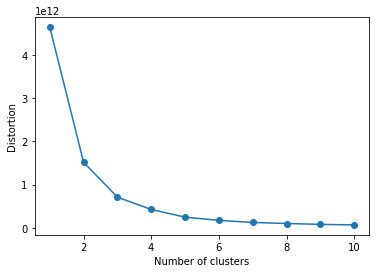

In [369]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(principalComponents)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [407]:
features

gender_F  gender_M  gender_O   income   age  event_offer completed  \
0           0.0       1.0       0.0  72000.0  33.0                      3   
1           0.0       0.0       1.0  57000.0  40.0                      3   
2           1.0       0.0       0.0  90000.0  59.0                      3   
3           1.0       0.0       0.0  60000.0  24.0                      3   
4           1.0       0.0       0.0  73000.0  26.0                      3   
...         ...       ...       ...      ...   ...                    ...   
14820       1.0       0.0       0.0  83000.0  69.0                      3   
14821       0.0       1.0       0.0  73000.0  71.0                      3   
14822       0.0       1.0       0.0  56000.0  71.0                      0   
14823       0.0       1.0       0.0  34000.0  34.0                      3   
14824       1.0       0.0       0.0  62000.0  45.0                      6   

       event_offer received  event_offer viewed  event_transaction  amount  \
0                         5                   4                  8  127.60   
1                         5                   5                  5   79.46   
2                         5                   3                  8  196.86   
3                         4                   4                 12  154.05   
4                         5                   4                 18   48.34   
...                     ...                 ...                ...     ...   
14820                     6                   3                 11  580.98   
14821                     5                   4                  6   29.94   
14822                     3                   2                  5   12.15   
14823                     4                   4                 12   88.83   
14824                     6                   6                 15  226.07   

       ...  log_income   log_age  log_event_offer completed  \
0      ...   11.184435  3.526361                   1.386719   
1      ...   10.950824  3.713572                   1.386719   
2      ...   11.407576  4.094345                   1.386719   
3      ...   11.002117  3.218876                   1.386719   
4      ...   11.198228  3.295837                   1.386719   
...    ...         ...       ...                        ...   
14820  ...   11.326608  4.248495                   1.386719   
14821  ...   11.198228  4.276666                   1.386719   
14822  ...   10.933125  4.276666                   0.000000   
14823  ...   10.434145  3.555348                   1.386719   
14824  ...   11.034906  3.828641                   1.946289   

       log_event_offer received  log_event_offer viewed  \
0                      1.791992                1.609375   
1                      1.791992                1.791992   
2                      1.791992                1.386719   
3                      1.609375                1.609375   
4                      1.791992                1.609375   
...                         ...                     ...   
14820                  1.946289                1.386719   
14821                  1.791992                1.609375   
14822                  1.386719                1.098633   
14823                  1.609375                1.609375   
14824                  1.946289                1.946289   

       log_event_transaction  log_amount  log_trans with offer  \
0                   2.197266    4.856707              1.386294   
1                   1.791992    4.387760              1.098612   
2                   2.197266    5.287560              1.098612   
3                   2.564453    5.043748              1.386294   
4                   2.945312    3.898735              1.386294   
...                      ...         ...                   ...   
14820               2.484375    6.366436              1.386294   
14821               1.946289    3.432050              1.098612   
14822               1.791992    2.576422              0.000000   
14823              

In [422]:
X = features.drop(columns=['log_amount','log_event_offer received'])
Y = X.iloc[:,-8:]

Y 

log_income   log_age  log_event_offer completed  \
0       11.184435  3.526361                   1.386719   
1       10.950824  3.713572                   1.386719   
2       11.407576  4.094345                   1.386719   
3       11.002117  3.218876                   1.386719   
4       11.198228  3.295837                   1.386719   
...           ...       ...                        ...   
14820   11.326608  4.248495                   1.386719   
14821   11.198228  4.276666                   1.386719   
14822   10.933125  4.276666                   0.000000   
14823   10.434145  3.555348                   1.386719   
14824   11.034906  3.828641                   1.946289   

       log_event_offer viewed  log_event_transaction  log_trans with offer  \
0                    1.609375               2.197266              1.386294   
1                    1.791992               1.791992              1.098612   
2                    1.386719               2.197266              1.098612   
3                    1.609375               2.564453              1.386294   
4                    1.609375               2.945312              1.386294   
...                       ...                    ...                   ...   
14820                1.386719               2.484375              1.386294   
14821                1.609375               1.946289              1.098612   
14822                1.098633               1.791992              0.000000   
14823                1.609375               2.564453              1.386294   
14824                1.946289               2.773438              1.945910   

       log_viewed_complated  log_avg_trans  
0                  0.000000       2.830268  
1                  1.386294       2.826722  
2                  1.098612       3.242983  
3                  1.386294       2.627563  
4                  1.098612       1.305626  
...                     ...            ...  
14820              0.693147       3.985645  
14821              1.098612       1.790091  
14822              0.000000       1.232560  
14823              1.098612       2.128232  
14824              1.609438       2.776954  

[14825 rows x 8 columns]

In [423]:
kmeans_model = KMeans(n_clusters = 4, 
                              init='k-means++', 
                              max_iter=450, 
                              random_state=42)


X['cluster']= kmeans_model.fit_predict(Y)


In [424]:
X

gender_F  gender_M  gender_O   income   age  event_offer completed  \
0           0.0       1.0       0.0  72000.0  33.0                      3   
1           0.0       0.0       1.0  57000.0  40.0                      3   
2           1.0       0.0       0.0  90000.0  59.0                      3   
3           1.0       0.0       0.0  60000.0  24.0                      3   
4           1.0       0.0       0.0  73000.0  26.0                      3   
...         ...       ...       ...      ...   ...                    ...   
14820       1.0       0.0       0.0  83000.0  69.0                      3   
14821       0.0       1.0       0.0  73000.0  71.0                      3   
14822       0.0       1.0       0.0  56000.0  71.0                      0   
14823       0.0       1.0       0.0  34000.0  34.0                      3   
14824       1.0       0.0       0.0  62000.0  45.0                      6   

       event_offer received  event_offer viewed  event_transaction  amount  \
0                         5                   4                  8  127.60   
1                         5                   5                  5   79.46   
2                         5                   3                  8  196.86   
3                         4                   4                 12  154.05   
4                         5                   4                 18   48.34   
...                     ...                 ...                ...     ...   
14820                     6                   3                 11  580.98   
14821                     5                   4                  6   29.94   
14822                     3                   2                  5   12.15   
14823                     4                   4                 12   88.83   
14824                     6                   6                 15  226.07   

       ...  log_gender_O  log_income   log_age  log_event_offer completed  \
0      ...      0.000000   11.184435  3.526361                   1.386719   
1      ...      0.693147   10.950824  3.713572                   1.386719   
2      ...      0.000000   11.407576  4.094345                   1.386719   
3      ...      0.000000   11.002117  3.218876                   1.386719   
4      ...      0.000000   11.198228  3.295837                   1.386719   
...    ...           ...         ...       ...                        ...   
14820  ...      0.000000   11.326608  4.248495                   1.386719   
14821  ...      0.000000   11.198228  4.276666                   1.386719   
14822  ...      0.000000   10.933125  4.276666                   0.000000   
14823  ...      0.000000   10.434145  3.555348                   1.386719   
14824  ...      0.000000   11.034906  3.828641                   1.946289   

       log_event_offer viewed  log_event_transaction  log_trans with offer  \
0                    1.609375               2.197266              1.386294   
1                    1.791992               1.791992              1.098612   
2                    1.386719               2.197266              1.098612   
3                    1.609375               2.564453              1.386294   
4                    1.609375               2.945312              1.386294   
...                       ...                    ...                   ...   
14820                1.386719               2.484375              1.386294   
14821                1.609375               1.946289              1.098612   
14822                1.098633               1.791992              0.000000   
14823                1.609375               2.564453              1.386294   
14824                1.946289               2.773438              1.945910   

       log_viewed_complated  log_avg_trans  cluster  
0                  0.000000       2.830268        1  
1                  1.386294       2.826722        3  
2                  1.098612       3.242983        3  
3                  1.386294       2.627563        3  
4            

In [394]:
colum= ['log_event_offer completed','log_viewed_complated']

colum_v1 = ['log_trans with offer','log_viewed_complated']

In [425]:
X.groupby(['cluster']).agg(['mean','count']).iloc[:,10:30]

event_offer completed       event_offer received        \
                         mean count                 mean count   
cluster                                                          
0                    1.853529  3202             4.535603  3202   
1                    1.605673  3208             4.041147  3208   
2                    0.057949  2692             4.340639  2692   
3                    3.639350  5723             4.775293  5723   

        event_offer viewed       event_transaction            amount        \
                      mean count              mean count        mean count   
cluster                                                                      
0                 3.193004  3202         12.299188  3202   57.929225  3202   
1                 2.973504  3208          4.238155  3208  101.003151  3208   
2                 2.733284  2692          4.879643  2692   14.867303  2692   
3                 3.973266  5723         10.107112  5723  207.131248  5723   

        trans with offer       viewed_complated        avg_trans        \
                    mean count             mean count       mean count   
cluster                                                                  
0               1.737664  3202         1.363210  3202   4.839603  3202   
1               1.435162  3208         0.918641  3208  23.713208  3208   
2               0.057949  2692         0.005572  2692   2.767719  2692   
3               3.364844  5723         2.666259  5723  21.320412  5723   

        log_gender_F       log_gender_M        
                mean count         mean count  
cluster                                        
0           0.182703  3202     0.502001  3202  
1           0.369693  3208     0.314163  3208  
2           0.159125  2692     0.526297  2692  
3           0.358019  5723     0.323017  5723

In [426]:
cluster_centers = kmeans_model.cluster_centers_
import plotly.express as px
import plotly.graph_objects as go
fig = px.scatter_3d(X,
                    x="log_event_transaction",
                    y="log_viewed_complated",
                    z="log_trans with offer",
                    color='cluster',
                    hover_data=["event_transaction",
                                "viewed_complated",
                                "trans with offer"],
                    category_orders = {"cluster": 
                                       ["0", "1", "2"]},
                    )

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

In [427]:
from sklearn.metrics import silhouette_score
print(silhouette_score(Y, kmeans_model.labels_, metric='euclidean'))

0.29615788843957475


In [ ]:
df_combine_person['%_completed']=df_combine_person['event_offer completed']/df_combine_person['event_offer received']
df_combine_person['%_completed_after_view']=df_combine_person['viewed_complated']/df_combine_person['event_offer completed']
df_combine_person['%_trans_with_offer']=df_combine_person['trans with offer']/df_combine_person['event_transaction']

In [455]:
df_combine_person['event_offer completed'].sum()

32070

In [456]:
df_combine_person['viewed_complated'].sum()

22586.0

In [517]:
col_names = ['avg_trans','income', 'age','viewed_complated','event_offer completed','trans with offer','event_transaction']
features = df_combine_person[col_names]
for x in features.columns:
    apply_log1p_transformation(features, x)

<ipython-input-60-0801b5c13b7f>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [518]:
features.drop_duplicates(inplace=True)
features.shape

(14808, 14)

In [519]:
features=features.fillna(0).round(decimals = 2)
count = np.isinf(features).values.sum()
features.replace([np.inf, -np.inf], np.nan, inplace=True)
features = features.dropna()
features.shape

(14808, 14)

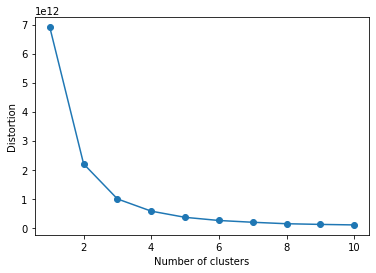

In [520]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(features)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [521]:
X = features

In [522]:
X

avg_trans   income   age  viewed_complated  event_offer completed  \
0          15.95  72000.0  33.0               0.0                      3   
1          15.89  57000.0  40.0               3.0                      3   
2          24.61  90000.0  59.0               2.0                      3   
3          12.84  60000.0  24.0               3.0                      3   
4           2.69  73000.0  26.0               2.0                      3   
...          ...      ...   ...               ...                    ...   
14820      52.82  83000.0  69.0               1.0                      3   
14821       4.99  73000.0  71.0               2.0                      3   
14822       2.43  56000.0  71.0               0.0                      0   
14823       7.40  34000.0  34.0               2.0                      3   
14824      15.07  62000.0  45.0               4.0                      6   

       trans with offer  event_transaction  log_avg_trans  log_income  \
0                     3                  8           2.83       11.18   
1                     2                  5           2.83       10.95   
2                     2                  8           3.24       11.41   
3                     3                 12           2.63       11.00   
4                     3                 18           1.30       11.20   
...                 ...                ...            ...         ...   
14820                 3                 11           3.99       11.33   
14821                 2                  6           1.79       11.20   
14822                 0                  5           1.23       10.93   
14823                 3                 12           2.13       10.43   
14824                 6                 15           2.78       11.03   

       log_age  log_viewed_complated  log_event_offer completed  \
0         3.53                  0.00                   1.389648   
1         3.71                  1.39                   1.389648   
2         4.09                  1.10                   1.389648   
3         3.22                  1.39                   1.389648   
4         3.30                  1.10                   1.389648   
...        ...                   ...                        ...   
14820     4.25                  0.69                   1.389648   
14821     4.28                  1.10                   1.389648   
14822     4.28                  0.00                   0.000000   
14823     3.56                  1.10                   1.389648   
14824     3.83                  1.61                   1.950195   

       log_trans with offer  log_event_transaction  
0                      1.39               2.199219  
1                      1.10               1.790039  
2                      1.10               2.199219  
3                      1.39               2.560547  
4                      1.39               2.939453  
...                     ...                    ...  
14820                  1.39               2.480469  
14821                  1.10               1.950195  
14822                  0.00               1.790039  
14823                  1.39               2.560547  
14824                  1.95               2.769531  

[14808 rows x 14 columns]

In [489]:
X = features.fillna(0)


In [524]:
kmeans_model = KMeans(n_clusters = 4, 
                              init='k-means++', 
                              max_iter=500, 
                              random_state=42)


X['cluster']= kmeans_model.fit_predict(X.iloc[:,7:])


In [523]:
X.iloc[:,7:]

log_avg_trans  log_income  log_age  log_viewed_complated  \
0               2.83       11.18     3.53                  0.00   
1               2.83       10.95     3.71                  1.39   
2               3.24       11.41     4.09                  1.10   
3               2.63       11.00     3.22                  1.39   
4               1.30       11.20     3.30                  1.10   
...              ...         ...      ...                   ...   
14820           3.99       11.33     4.25                  0.69   
14821           1.79       11.20     4.28                  1.10   
14822           1.23       10.93     4.28                  0.00   
14823           2.13       10.43     3.56                  1.10   
14824           2.78       11.03     3.83                  1.61   

       log_event_offer completed  log_trans with offer  log_event_transaction  
0                       1.389648                  1.39               2.199219  
1                       1.389648                  1.10               1.790039  
2                       1.389648                  1.10               2.199219  
3                       1.389648                  1.39               2.560547  
4                       1.389648                  1.39               2.939453  
...                          ...                   ...                    ...  
14820                   1.389648                  1.39               2.480469  
14821                   1.389648                  1.10               1.950195  
14822                   0.000000                  0.00               1.790039  
14823                   1.389648                  1.39               2.560547  
14824                   1.950195                  1.95               2.769531  

[14808 rows x 7 columns]

In [526]:
X.groupby(['cluster']).agg(['mean'])

avg_trans        income        age viewed_complated  \
              mean          mean       mean             mean   
cluster                                                        
0        21.357708  72384.443297  57.205989         2.640681   
1         2.776670  52357.357357  49.818694         0.004129   
2        23.598781  80244.839632  60.747221         0.919022   
3         4.779067  48866.834171  46.791457         1.361809   

        event_offer completed trans with offer event_transaction  \
                         mean             mean              mean   
cluster                                                            
0                    3.628807         3.354672         10.083118   
1                    0.054054         0.054054          4.930556   
2                    1.577961         1.408701          4.172753   
3                    1.843593         1.729585         12.276696   

        log_avg_trans log_income   log_age log_viewed_complated  \
                 mean       mean      mean                 mean   
cluster                                                           
0            3.004352  11.149897  4.020620             1.252278   
1            1.192117  10.822980  3.853367             0.002849   
2            3.095027  11.264601  4.094728             0.574208   
3            1.671275  10.760669  3.787582             0.801052   

        log_event_offer completed log_trans with offer log_event_transaction  
                             mean                 mean                  mean  
cluster                                                                       
0                        1.510742             1.450334              2.341797  
1                        0.037292             0.037297              1.563477  
2                        0.882812             0.825421              1.559570  
3                        0.998535             0.961354              2.492188

In [527]:
cluster_centers = kmeans_model.cluster_centers_

In [528]:
cluster_centers = kmeans_model.cluster_centers_
import plotly.express as px
import plotly.graph_objects as go
fig = px.scatter_3d(X,
                    x="income",
                    y="avg_trans",
                    z="trans with offer",
                    color='cluster',
                    hover_data=["income",
                                "avg_trans",
                                "trans with offer"],
                    category_orders = {"cluster": 
                                       ["0", "1", "2"]},
                    )

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

In [529]:
from sklearn.metrics import silhouette_score
print(silhouette_score(X.iloc[:,7:], kmeans_model.labels_, metric='euclidean'))

0.5340697474376921


In [ ]:
df_combine_person = df_combine.groupby(['person']).agg({'offer reward':'mean','difficulty':'mean',\
                            'bogo':'sum','discount':'sum','event_offer completed':'sum',\
                            'event_transaction':'sum','amount':'sum'}).reset_index()

In [ ]:

# define dataset
X, y = df_combine.iloc[:,15:22],df_combine['offer_type']
# create scatter plot for samples from each class
km = KMeans(
    n_clusters=6, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)

y_km = km.fit_predict(X)

In [ ]:
from numpy import where
from sklearn.datasets import make_classification
from matplotlib import pyplot
make_classification

In [ ]:
y_km

In [ ]:
df_combine.corr()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# taking all rows but only 6 columns
correlation_mat = df_combine.corr()
sns.heatmap(correlation_mat, annot = True)
plt.show()

In [ ]:
df_small = X.groupby('cluster').mean().reset_index()


In [ ]:
df_combine

In [ ]:
df_offers_combine=df_combine.groupby('offer id').sum().reset_index()

df_offers_combine['%_of_recived_completed'] = df_offers_combine['event_offer completed']\
                                            /df_offers_combine['event_offer received']
df_offers_combine['%_of_recived_viewed'] = df_offers_combine['event_offer viewed']\
                                            /df_offers_combine['event_offer received']
df_offers_combine.iloc[: , 4:]

In [ ]:
df_combine.info()

In [ ]:
combined_offer_viewed = df_combine

In [ ]:
combined_offer_viewed['viewed_complated'].sum()

In [ ]:
combined_offer_viewed

In [ ]:
combined_offer_viewed = combined_offer_viewed.iloc[: , 13:22]

In [ ]:
combined_offer_viewed.drop_duplicates(inplace=True)
combined_offer_viewed.fillna(0,inplace=True)

In [ ]:
combined_offer_viewed

In [ ]:
combined_offer_viewed[column].sum()/combined_offer_viewed[column].count()

In [ ]:
#dla kilku parametrów: viewed_complated ,trans with offer

from sklearn.model_selection import train_test_split


column='viewed_complated'


X,y=combined_offer_viewed.drop(columns=[column,'trans with offer']), \
                                                    combined_offer_viewed[column]
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.31, random_state=0)

In [ ]:
y_train.shape

In [ ]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)

In [ ]:
predictions = logisticRegr.predict(x_test)
score = logisticRegr.score(x_test, y_test)
print(score)

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=logisticRegr, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# taking all rows but only 6 columns
df_small = X_train
correlation_mat = df_small.corr()
sns.heatmap(correlation_mat, annot = True)
plt.show()

In [ ]:
logisticRegr.predict(x_test.iloc[4])

In [ ]:

from sklearn.naive_bayes import GaussianNB
X, y = combined_offer_viewed.drop(columns=['viewed_complated']), \
                                                    combined_offer_viewed['viewed_complated']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

("Number of mislabeled points out of a total %d points : %d"% (X_test.shape[0], (y_test != y_pred).sum()))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [ ]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=20)


clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
#lista najaktywnijeszych uzytkownikow do testowania wyników
transcript.groupby('person').count().sort_values(by='event',ascending=False)